# Exercise 2

### Load libraries

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
from scipy import stats
import time
import random
import itertools
from tabulate import tabulate


## Implementing models

### Erdos-Renyi model

In [3]:
def erdos(n, p):
    #input:
    #n: number of nodes
    #p: probability of an edge to exist
    
    #output:
    #G: graph that is created through Erdos–Renyi model
    
    #create the graph with n nodes
    G = nx.empty_graph(n)
    
    #all possible edges
    ed = list(itertools.combinations(range(n), 2))
    
    #for each possible edge i
    for i in range(len(ed)):
        
        #generate a random number between 0 and 1 and if it is lower or equal than p
        if random.random() <= p:
            
            #adding edge i
            G.add_edge(*ed[i])
            
    #return the graph
    return(G)


### Barabasi-Albert model

In [4]:
def barabasi_albert(n , l):
    #input:
    #n: number of nodes
    #l: number of neighbors that a newly arrived node comes with
    
    #output:
    #G: graph that is created through Barabasi–Albert model
    
    G = nx.Graph(Name = "Barabasi")
    
    #Start from one node, t = 0
    G.add_node(1)
    
    #at time t = 1, I add second node, no multiple edges are possible
    G.add_node(2)
    G.add_edge(1,2)
    
    #degree for each node
    degree = G.degree()
    
    #for each node i, from time t=2
    for i in range(3, n + 1):
        
        #creating a dictionary: nodes are keys, degrees are the values
        node_measures = dict(G.nodes())
        for node in node_measures:
            node_measures[node] = degree[node]
        
        #np.array with an element i is the degree for the node i 
        deg = np.array(list(node_measures.values()))
        
        #element i represents the probability for the new node to attach to node i
        #probability of node i is proportioanal to degree of node i
        prob = deg / sum(deg)
        
        #np.array in which each element is a node
        nodes = np.array(list(G.nodes()))
        
        #adding the new node
        G.add_node(i)
        
        #construct a distribution probability defined by a list of support points(nodes)
        #and corresponding probabilities, computed respected to degree of each node
        custm = stats.rv_discrete(name='custm', values=(nodes, prob))
        
        #Random number generation: I cannot choose more times the same node so I have used the function set
        #list of nodes selected at random 
        R = list(set(custm.rvs(size = l)))
        
        #for each node selected
        for j in R:
            
            #adding the new edge 
            G.add_edge(i,j)
    
    #return the graph
    return(G)

### My model

In [5]:
def my_model(n, p, l):
    #input:
    #n: number of nodes
    #l: number of neighbors that a newly arrived node comes with
    #p: weight of Erdos-Renyi model
    
    #output:
    #G: graph that is created through my model
    
    #create the graph with n nodes
    G = nx.empty_graph(n)
    
    #degree for each node
    degree = G.degree()
    
    #np.array in which each element is a node
    nodes = np.array(list(G.nodes()))
    
    #probability of node i is uniform, each node has the same probability 1/n
    prob = np.array([1]*len(G)) / len(G)
    
    #construct an arbitrary distribution probability defined by a list of support points(nodes)
    #and corresponding probabilities, computed uniformly, same for each node
    custm = stats.rv_discrete(name='custm', values=(nodes, prob))
    
    #for each node
    for i in range(len(G)):
        
        #generate a random number between 0 and 1 and if it is lower or equal than p
        if random.random() < p:
            
            #Random number generation: I cannot choose more times the same node so I have used the function set
            #list of nodes selected at random 
            R = list(set(custm.rvs(size = l)))
            
            #for each node selected
            for j in R:
                
                #I cannot have self loops
                if j != i:
                    
                    #adding new edge
                    G.add_edge(i,j)
                    
        else:
            
            #considering the l neighbours of the i-th node, from l/2 nodes before to l/2 after
            for k in range(int(-l/2),int(l/2)):
                
                #I do not consider the i-th node itself 
                if k ==0:
                    continue
                #nodes at the border do not have previous or next nodes, so for this reason
                #this try and except
                try:
                    G.add_edge(i,i+k)
                except:
                    pass
    #return the graph
    return(G)


## Implementing the metrics

In [6]:
def measure(grafo):
    #input:
    #grafo: graph
    
    #output:
    #node_measures: a dictionary that has as keys the nodes and as values the degree for each node
    #diameter: diameter of the graph
    #avg_cluster: clustering coefficient of the graph
    
    try:
        #computing the diameter of the graph
        diameter = nx.approximation.diameter(grafo)

    except:
        #if the graph is disconnected python raises an error
        #it happens just with graphs with few nodes
        diameter = math.inf
        
    #clustering coefficient of the graph
    #I have not used function average_clustering because the reference says it might be slower
    #clustering coefficient for each node
    e = nx.clustering(grafo)
    
    #taking the mean of all clustering coefficients
    avg_cluster = sum(e.values())/len(e)
    
    #computing the degree for each node, like done before 
    degree = grafo.degree()
    node_measures = dict(grafo.nodes())
    for node in node_measures:
        node_measures[node] = degree[node]
        
    #just creating a table with all information of a given a graph, I will never print it
    table = [['Information requested', 'Answers'], ['Number of nodes', len(grafo)],['Number of edges', len(grafo.edges())],
             ['Diameter', diameter], ['Clustering Coefficient', avg_cluster]]
    return(node_measures, diameter, avg_cluster, table)


### Barabasi-Albert Model

In [28]:
#choosing a grid of values for l and n
l = [3,5,7,10,15,5,5,5]
n = [20000,20000,20000,20000,20000,40000,80000,100000]

#creating for each couple of values a graph through Barabasi–Albert model
barabasi_trial = [barabasi_albert(n[i], l[i]) for i in range(8)]


In [29]:
#creating a list in which each element contains the metrics of a graph
res_barabasi = []
for i in barabasi_trial:
    res_barabasi.append(measure(i))

In [30]:
#list in which each element will be a diameter of a graph
diam = []

#list in which each element will be a clustering coefficient of a graph
clus = []

#I take the second and the third output of the function measure to have
#diameter and clustering coefficient
for i in res_barabasi:
    diam.append(i[1])
    clus.append(i[2])

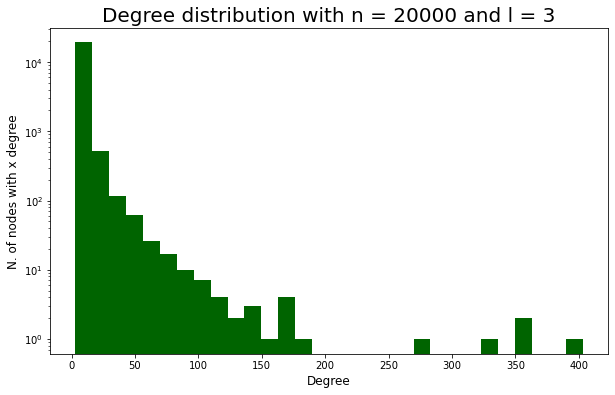

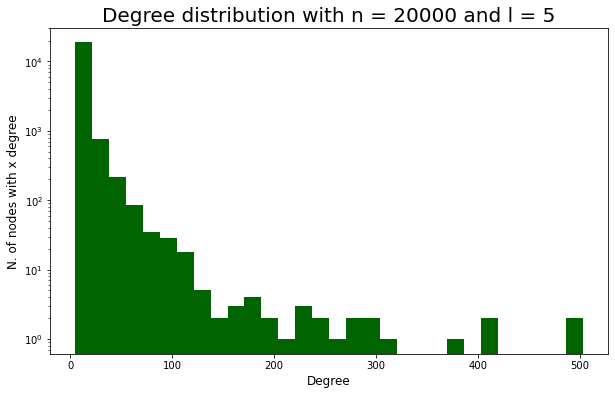

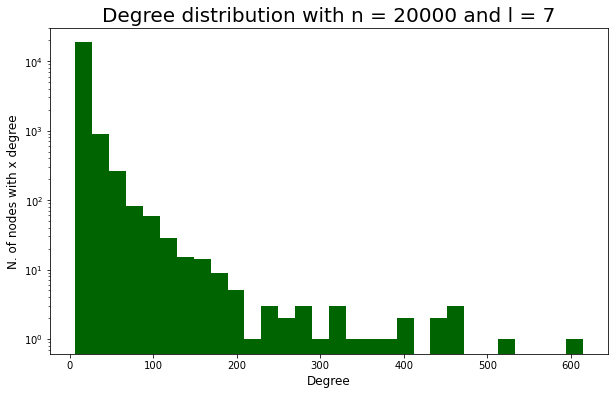

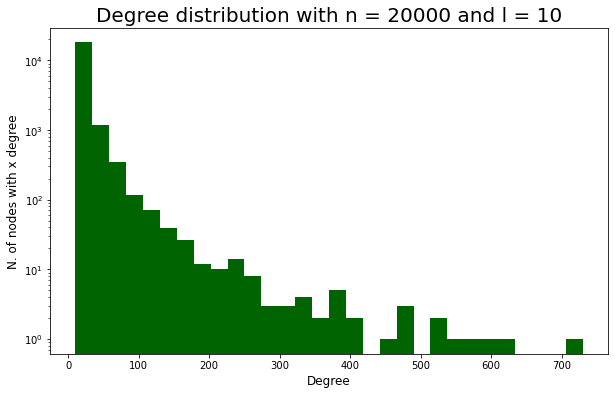

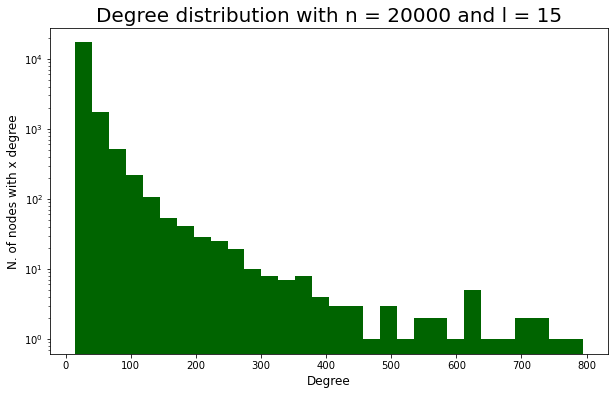

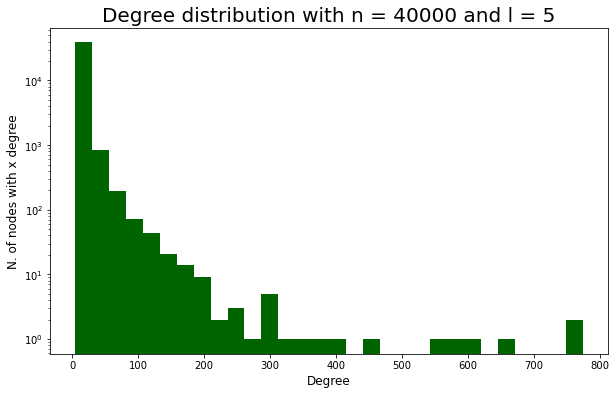

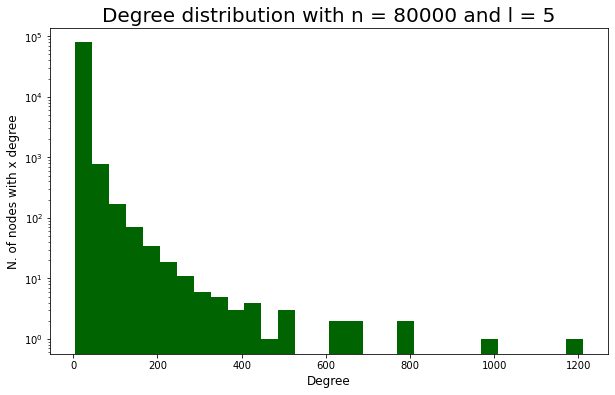

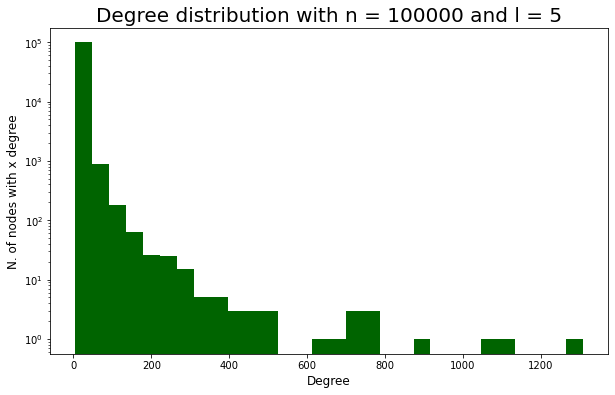

In [33]:
#counter
c=0

#for each simulation
#plot the degree distribution
for i in res_barabasi:
    plt.figure(figsize=(10,6))
    plt.hist(i[0].values(), bins = 30, range = [l[c], max(i[0].values()) +2], color='darkgreen')
    plt.title(f"Degree distribution with n = "+str(n[c])+" and l = "+str(l[c]), fontsize = 20)
    plt.xlabel("Degree", fontsize =12)
    plt.ylabel("N. of nodes with x degree", fontsize = 12)
    plt.yscale('log')
    #plt.xscale('log')
    plt.show()
    c += 1

In [32]:
#crating a dataframe with information needed
df = pd.DataFrame(list(zip(n, l, diam, clus)),
               columns =['Number of nodes', 'New edges at each step', 'Diameter', 'Clustering Coefficient'])
df

,Number of nodes,New edges at each step,Diameter,Clustering Coefficient
0,20000,3,7,0.002675
1,20000,5,5,0.003943
2,20000,7,5,0.004723
3,20000,10,5,0.006072
4,20000,15,4,0.007929
5,40000,5,6,0.002208
6,80000,5,6,0.001313
7,100000,5,6,0.001141


### Erdos-Renyi Model

In [7]:
#choosing a grid of values for p and n
#all together my kernel dies, so I have experimented groups of couple (p,n)
#save the results and then merge the dataframe together. 
p = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.1, 0.01, 0.001, 0.001, 0.001]
n = [10000, 10000, 10000, 10000, 10000, 10000, 20000, 20000, 20000, 40000, 60000]

#I run just the first three to show that it works
p = [0.001, 0.01, 0.05]
n = [10000, 10000, 10000]

#creating for each couple of values a graph through Erdos-Renyi model
erdos_trial = [erdos(n[i], p[i]) for i in range(3)]

In [8]:
#creating a list in which each element contains the metrics of a graph
res_erdos = []
for i in erdos_trial:
    res_erdos.append(measure(i))

In [9]:
#list in which each element will be a diameter of a graph
diam = []

#list in which each element will be a clustering coefficient of a graph
clus = []

#I take the second and the third output of the function measure to have
#diameter and clustering coefficient
for i in res_erdos:
    diam.append(i[1])
    clus.append(i[2])

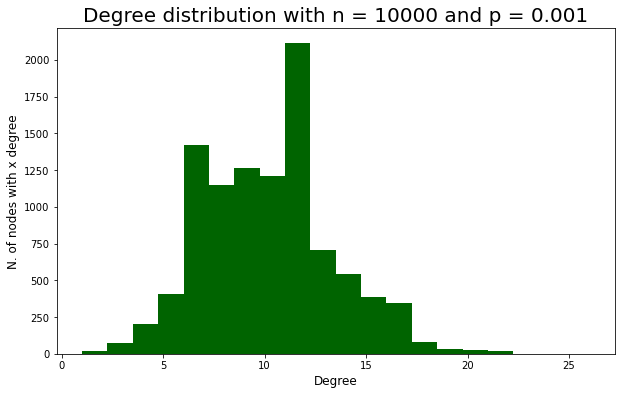

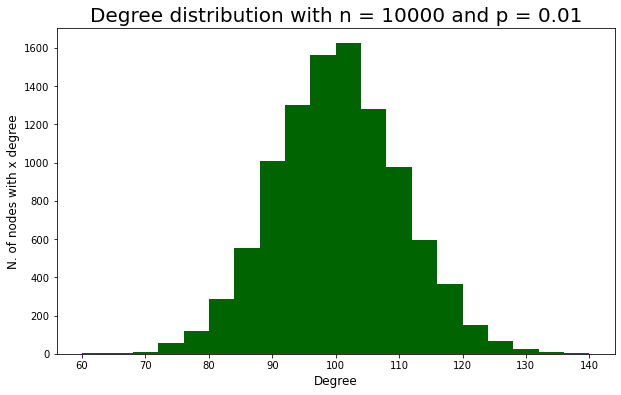

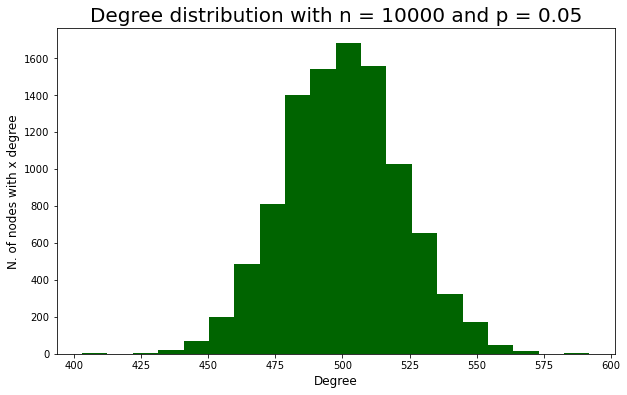

In [10]:
#counter
c=0
bins = 20
#for each simulation
#plot the degree distribution
for i in res_erdos:
    plt.figure(figsize=(10,6))
    plt.hist(i[0].values(),bins = bins, color='darkgreen')
    plt.title(f"Degree distribution with n = "+str(n[c])+" and p = "+str(p[c]), fontsize = 20)
    plt.xlabel("Degree", fontsize =12)
    plt.ylabel("N. of nodes with x degree", fontsize = 12)
    plt.show()
    c += 1
    #Nodes versus their degree
    #plt.figure(figsize=(10,6))
    #plt.bar(i[0].keys(), res_barabasi[0][0].values(), color='g')
    #plt.title(f"Degree distribution with n = "+str(n[c])+" and l = "+str(l[c]), fontsize = 20)
    #plt.xlabel("Node", fontsize =12)
    #plt.ylabel("Degree", fontsize = 12)
    #plt.yscale('log')
    #plt.show()
    

In [ ]:
#crating a dataframe with information needed
df_1 = pd.DataFrame(list(zip(n, p, diam, clus)),
               columns =['Number of nodes', 'New edges at each step', 'Diameter', 'Average Cluster Coefficient'])
df_1.to_csv("example14.csv")

In [20]:
#just merging together all the dataframe obtained
z=pd.read_csv("example13", sep = ",",usecols =[i for i in cols if i != 'Unnamed: 0'])
z.columns = ["Number of nodes","Prob of an edge to exist","Diameter","Clustering Coefficient"]
a = pd.read_csv("example_4.csv", sep = ",")
a.columns = ["Number of nodes","Prob of an edge to exist","Diameter","Clustering Coefficient"]
b = pd.read_csv("example_1.csv", sep = ",")
b.columns = ["Number of nodes","Prob of an edge to exist","Diameter","Clustering Coefficient"]
f = pd.read_csv("example_5.csv", sep = ",")
f.columns = ["Number of nodes","Prob of an edge to exist","Diameter","Clustering Coefficient"]
c = pd.read_csv("example_3.csv", sep = ",")
c.columns = ["Number of nodes","Prob of an edge to exist","Diameter","Clustering Coefficient"]
q=pd.read_csv("example14", sep = ",",usecols =[i for i in cols if i != 'Unnamed: 0'])
q.columns = ["Number of nodes","Prob of an edge to exist","Diameter","Clustering Coefficient"]
e=pd.read_csv("example12", sep = ",",usecols =[i for i in cols if i != 'Unnamed: 0'])
e.columns = ["Number of nodes","Prob of an edge to exist","Diameter","Clustering Coefficient"]
pd.concat([z,a,c,b,f,q,e], ignore_index=True)

,Number of nodes,Prob of an edge to exist,Diameter,Clustering Coefficient
0,10000,0.001,6,0.000939
1,10000,0.010,3,0.010003
2,10000,0.050,2,0.050012
3,10000,0.100,2,0.100094
4,10000,0.300,2,0.299963
5,10000,0.500,2,0.500021
6,20000,0.100,2,0.100003
7,20000,0.010,3,0.009992
8,20000,0.001,5,0.000975
9,40000,0.001,4,0.001004


In [ ]:
#print(tabulate(r[1], headers='firstrow', tablefmt='fancy_grid'))

### Graph in SNAP library

In [34]:
#import the csv from SNAP library
deezer = pd.read_csv("deezer_europe_edges.csv", sep = ",", header = 0,index_col=False, names = ["node1","node2"])
deezer.head()

,node1,node2
0,0,14270
1,0,16976
2,0,12029
3,0,3001
4,0,14581


In [35]:
#from dataframe to graph
deezer = nx.from_pandas_edgelist(deezer, source ="node1", target ="node2", create_using=nx.Graph())
nx.info(deezer)

In [36]:
#import the csv from SNAP library
git = pd.read_csv("musae_git_edges.csv", sep = ",", header = 0, names = ["node1", "node2"])
git.head()

,node1,node2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


In [37]:
#from dataframe to graph
github = nx.from_pandas_edgelist(git, source ="node1", target ="node2", create_using=nx.Graph())
nx.info(github)

In [38]:
#import the csv from SNAP library
fb = pd.read_csv("musae_facebook_edges.csv", sep = ",", header = 0, names = ["node1", "node2"])
fb.head()

,node1,node2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829


In [39]:
#from dataframe to graph
facebook = nx.from_pandas_edgelist(fb, source ="node1", target ="node2", create_using=nx.Graph())
nx.info(facebook)

In [40]:
#import the csv from SNAP library
fb_2 = pd.read_csv("facebook_combined.txt", sep = " ", header = None, names = ["node1", "node2"])
fb_2.head()

,node1,node2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [41]:
#from dataframe to graph
facebook_2 = nx.from_pandas_edgelist(fb_2, source ="node1", target ="node2", create_using=nx.Graph())
nx.info(facebook_2)

<ipython-input-41-f766532d786a>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(facebook_2)


'Graph with 4039 nodes and 88234 edges'

In [45]:
#import the csv from SNAP library
twitch = pd.read_csv("musae_DE_edges.csv", sep = ",", header = 0, names = ["node1", "node2"])
twitch.head()


,node1,node2
0,0,9206
1,0,7787
2,0,2145
3,0,2684
4,0,7275


In [46]:
twitch = nx.from_pandas_edgelist(twitch, source ="node1", target ="node2", create_using=nx.Graph())
nx.info(twitch)

<ipython-input-46-d4d5da403ffe>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(twitch)


'Graph with 9498 nodes and 153138 edges'

In [47]:
#computing the metrics for each real graph 
real_net = [measure(deezer), measure(github), measure(facebook), measure(facebook_2), measure(twitch)]

#list in which each element is the number of nodes of each graph
n=[len(paper),len(github),len(facebook), len(facebook_2),len(twitch)]

#list in which each element is the number of edges of each graph
edg=[len(paper.edges()),len(github.edges()),len(facebook.edges()),len(facebook_2.edges()),len(twitch.edges())]

#list in which each element is the name of each graph 
nomi = ["Deezer", "Github", "Facebook Pages", "Facebook friends", "Twitch DE"]

#list in which each element is the diameter of each graph 
real_diam = [real_net[i][1] for i in range(5)]

#list in which each element is the clustering coefficient of each graph 
real_clus = [real_net[i][2] for i in range(5)]

#dataframe containg all the previous information together 
real_df = pd.DataFrame(list(zip(nomi, n, edg, real_diam, real_clus)),
               columns =['Network','Number of nodes', 'Number of edges', 'Diameter', 'Clustering Coefficient'])
real_df

,Network,Number of nodes,Number of edges,Diameter,Average Cluster Coefficient
0,Deezer,9877,25998,21,0.141160
1,Github,37700,289003,11,0.167537
2,Facebook Pages,22470,171002,15,0.359738
3,Facebook friends,4039,88234,8,0.605547
4,Twitch DE,9498,153138,7,0.200886


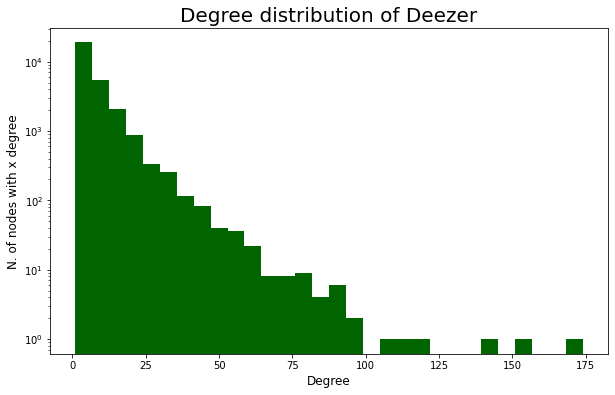

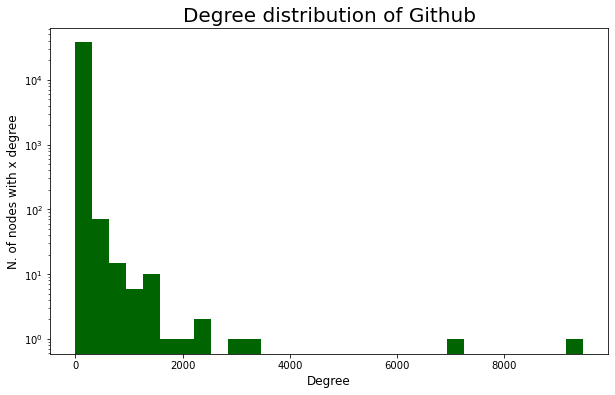

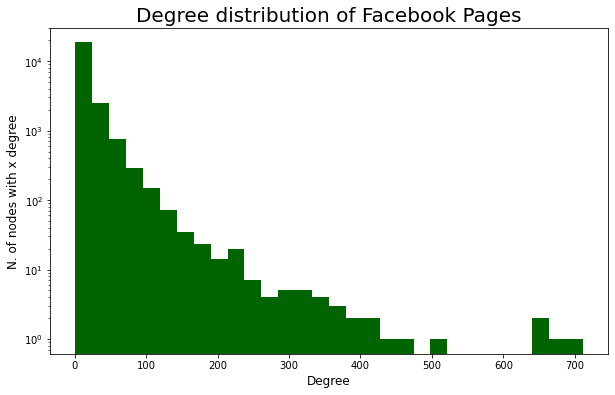

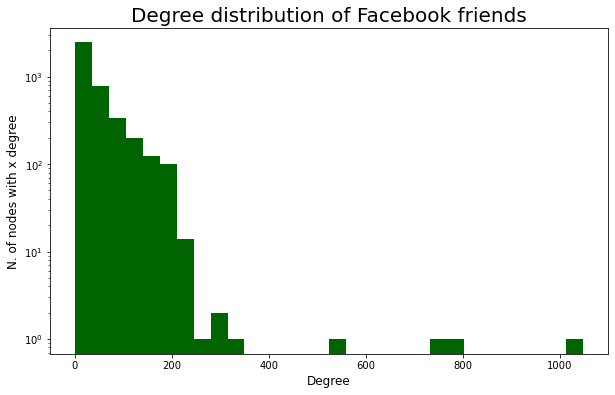

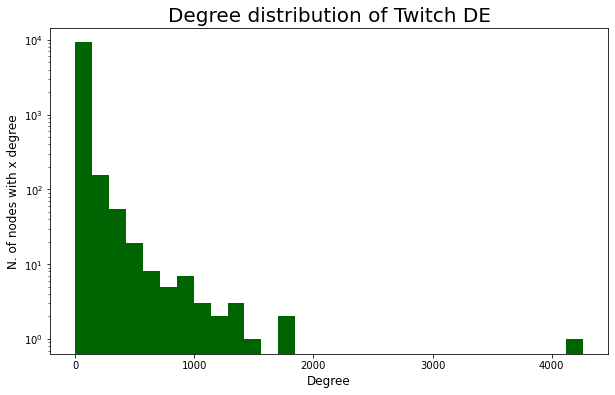

In [49]:
#counter
c=0

#for each simulation
#plot the degree distribution
for i in real_net:
    plt.figure(figsize=(10,6))
    plt.hist(i[0].values(), bins = 30, range = [1, max(i[0].values()) +2], color='darkgreen')
    plt.title(f"Degree distribution of "+nomi[c], fontsize = 20)
    plt.xlabel("Degree", fontsize =12)
    plt.ylabel("N. of nodes with x degree", fontsize = 12)
    plt.yscale('log')
    plt.show()
    c +=1

### My Model

In [1]:
#choosing a grid of values for p and l
l = [6, 6, 6, 4, 8, 8, 8]
n = [40000, 40000, 40000, 40000, 40000, 60000, 100000]
p = [0.8, 0.5, 0.2, 0.2, 0.2, 0.2, 0.2]

In [13]:
#creating for each triplet of values a graph through my model
mymod_trial = [my_model(n[i], p[i], l[i]) for i in range(7)]

In [14]:
#creating a list in which each element contains the metrics of a graph
res_mymod = []
for i in mymod_trial:
    res_mymod.append(measure(i))

In [15]:
#list in which each element will be a diameter of a graph
diam = []

#list in which each element will be a clustering coefficient of a graph
clus = []

#I take the second and the third output of the function measure to have
#diameter and clustering coefficient
for i in res_mymod:
    diam.append(i[1])
    clus.append(i[2])

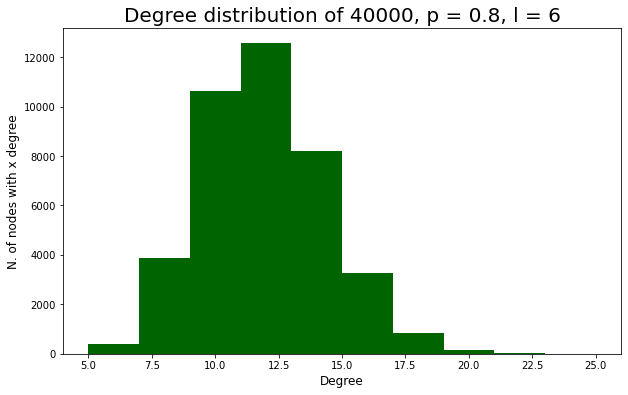

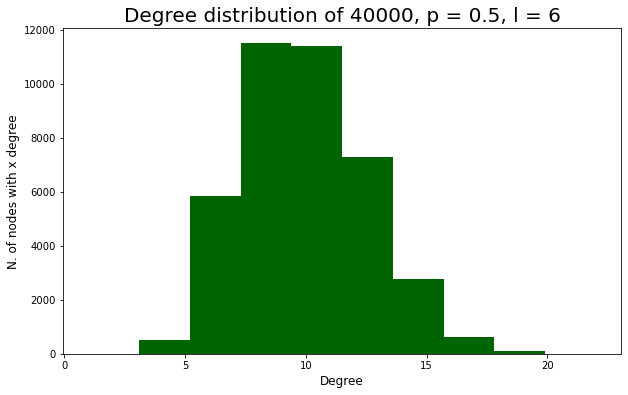

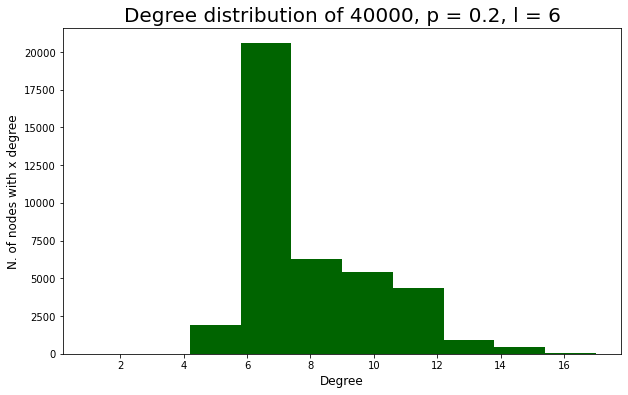

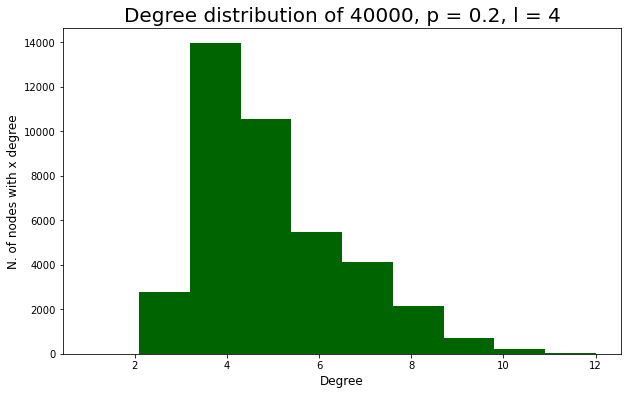

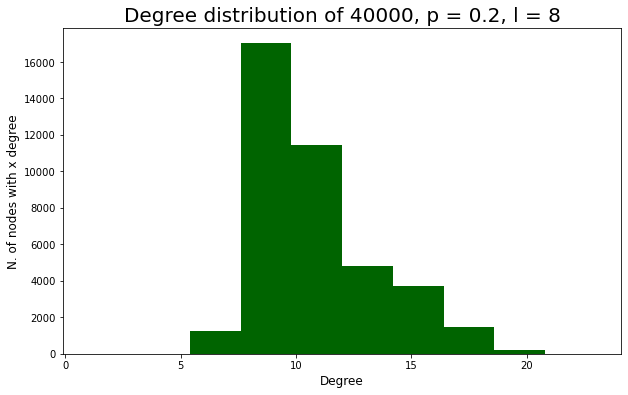

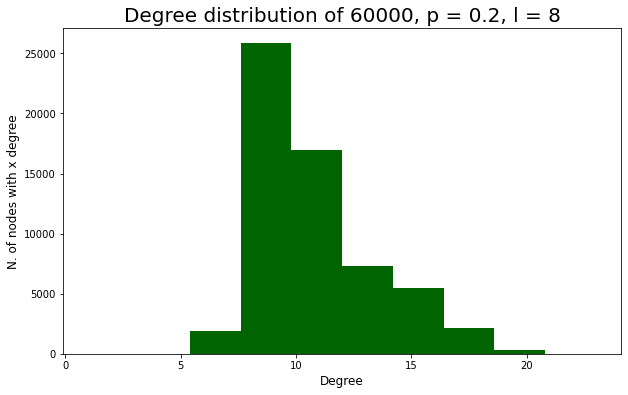

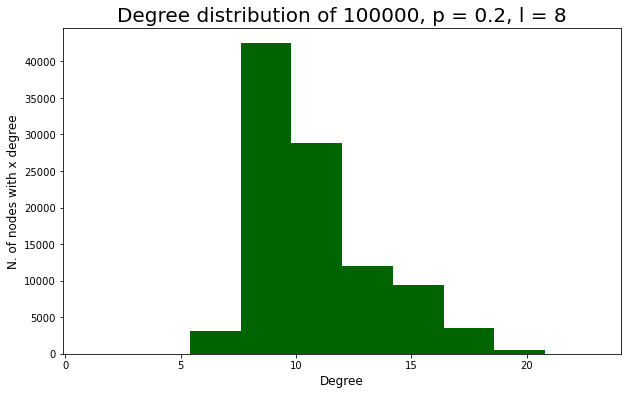

In [19]:
#counter
c=0
bins = 10

#for each simulation
#plot the degree distribution
for i in res_mymod:
    plt.figure(figsize=(10,6))
    plt.hist(i[0].values(), bins=bins, color='darkgreen')
    plt.title(f"Degree distribution of "+str(n[c])+", p = "+str(p[c])+", l = "+str(l[c]), fontsize = 20)
    plt.xlabel("Degree", fontsize =12)
    plt.ylabel("N. of nodes with x degree", fontsize = 12)
 
    plt.show()
    c += 1
    #Nodes versus their degree
    #plt.figure(figsize=(10,6))
    #plt.bar(i[0].keys(), res_barabasi[0][0].values(), color='g')
    #plt.title(f"Degree distribution with n = "+str(n[c])+" and l = "+str(l[c]), fontsize = 20)
    #plt.xlabel("Node", fontsize =12)
    #plt.ylabel("Degree", fontsize = 12)
    #plt.yscale('log')
    #plt.show()
    

In [17]:
#dataframe containg all the information together 
df_2 = pd.DataFrame(list(zip(n, l, p, diam, clus)),
               columns =['Number of nodes', 'New edges at each step','Weight of Erdos model', 'Diameter', 'Clustering Coefficient'])
df_2

,Number of nodes,New edges at each step,Weight of Erdos model,Diameter,Clustering Coefficient
0,40000,6,0.8,6,0.017057
1,40000,6,0.5,7,0.114595
2,40000,6,0.2,10,0.343632
3,40000,4,0.2,13,0.290938
4,40000,8,0.2,8,0.364548
5,60000,8,0.2,9,0.366190
6,100000,8,0.2,9,0.364698
